In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import pandas as pd
import folium
from shapely import wkt
from shapely.geometry import Polygon
import numpy as np

In [2]:
%load_ext kedro.ipython

[06/26/24 08:31:44] INFO     Registered line magic '%reload_kedro'                                   ]8;id=839926;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=549056;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=226816;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=972400;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=496172;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=509082;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\carga\Documents\KedroTutorial\montrealfirepredicition.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/26/24 08:31:47] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\integrations\kedro\hooks.py:13: KedroDeprecationWarning:                       
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\laz                
                             y_loader\__init__.py:83: KedroDeprecationWarning: 'GeoJSONDataSet' has                
                             been renamed to 'GeoJSONDataset', and the alias will be removed in                    
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project montrealfirepredicition                                  ]8;id=703351;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=323662;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=356690;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=315853;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[06/26/24 08:31:49] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\models\flowchart.py:13: KedroDeprecationWarning:                               
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\data_access\repositories\catalog.py:8: KedroDeprecationWarning:                
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[06/26/24 08:31:50] INFO     Registered line magic 'run_viz'                                        ]8;id=968534;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=173649;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
catalog.list()


[
    'incidents',
    'firestations',
    'firestation_areas',
    'census',
    'property_assessments',
    'combined_incidents',
    'preprocessed_incidents',
    'preprocessed_firestations',
    'preprocessed_firestation_areas',
    'preprocessed_property_assessments',
    'enhanced_incidents',
    'parameters'
]

In [4]:
df_firestation_area = catalog.load('preprocessed_firestation_areas')

                    INFO     Loading data from preprocessed_firestation_areas                   ]8;id=381714;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=846409;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\
                             (GeoJSONDataset)...                                                                   

In [5]:
df_firestation_area.head()

,FIRE_STATION_ID,geometry
0,72,"POLYGON ((-73.71849 45.52474, -73.71849 45.524..."
1,71,"POLYGON ((-73.73490 45.50978, -73.73490 45.509..."
2,32,"POLYGON ((-73.47494 45.70244, -73.47524 45.702..."
3,25,"POLYGON ((-73.58662 45.51555, -73.58244 45.513..."
4,31,"POLYGON ((-73.60336 45.52838, -73.60459 45.528..."


In [6]:
df_firestations= catalog.load('preprocessed_firestations')

[06/26/24 08:32:03] INFO     Loading data from preprocessed_firestations (CSVDataset)...        ]8;id=360464;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=899558;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [7]:
df_firestations.head()

,FIRE_STATION_ID,STREET_NUMBER,STREET_NAME,LATITUDE,LONGITUDE,START_DATE,END_DATE,AREA
0,3,256,rue Young,45.493454,-73.560172,2015-01-01,NaT,LE SUD-OUEST
1,15,1255,rue de la Sucrerie,45.484419,-73.560917,2015-01-01,NaT,LE SUD-OUEST
2,23,523,place Saint-Henri,45.477820,-73.585257,2015-01-01,NaT,LE SUD-OUEST
3,33,6040,boulevard Monk,45.457841,-73.595450,2015-01-01,NaT,LE SUD-OUEST
4,9,8100,boulevard Saint-Michel,45.563748,-73.610169,2019-05-06,NaT,VILLERAY-SAINT-MICHEL-PARC-EXTENSION


In [8]:
# Find unique values in each column
unique_to_df_firestation = set(df_firestations['FIRE_STATION_ID']) - set(df_firestation_area['FIRE_STATION_ID'])
unique_to_df_firestation_area = set(df_firestation_area['FIRE_STATION_ID']) - set(df_firestations['FIRE_STATION_ID'])

print("Values unique to firestation:\n", unique_to_df_firestation)
print("\nValues unique to firestation_area:\n", unique_to_df_firestation_area)

Values unique to firestation:
 {2, 79}

Values unique to firestation_area:
 set()


In [9]:
df_firestations[df_firestations['FIRE_STATION_ID'] == 79]


,FIRE_STATION_ID,STREET_NUMBER,STREET_NAME,LATITUDE,LONGITUDE,START_DATE,END_DATE,AREA
60,79,5520,avenue MacDonald,45.483487,-73.639332,1900-01-01,2009-11-05,HAMPSTEAD


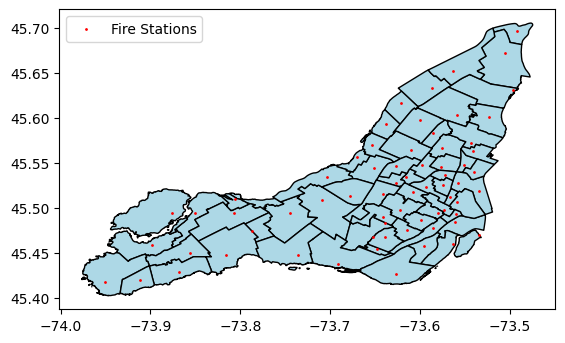

In [10]:
# Convert the fire station data into a GeoDataFrame
gdf_firestations = gpd.GeoDataFrame(
    df_firestations, 
    geometry=gpd.points_from_xy(df_firestations.LONGITUDE, df_firestations.LATITUDE),
)

# Plot the polygons
ax = df_firestation_area.plot(edgecolor='black', color='lightblue')

# Plot the fire stations on the same map
gdf_firestations.plot(ax=ax, marker='o', color='red', markersize=1, label='Fire Stations')

# Add legend and show the plot
plt.legend()
plt.show()
